In [8]:
import numpy as np
from utils import *
from copy import deepcopy
import os
from os.path import join,isdir

In [7]:
gt_path = '/home/user/zhaoy/local_dir/data/random_virtual_roots/diff_time_points/imitate_lupineSmall/172226/stopTime80.86%/ground_truth_res_2x.npy'
original_gt_path = '/home/user/zhaoy/local_dir/data/random_virtual_roots/diff_time_points/imitate_lupineSmall/172226/stopTime80.86%/ground_truth_res_2x_notThresholded.npy'
aliased_path = '/home/user/zhaoy/local_dir/data/random_virtual_roots/diff_time_points/imitate_lupineSmall/172226/stopTime80.86%/occupancy_small_alias_256x256x200.npy'
gt_original = np.load(original_gt_path)
gt = np.load(gt_path)
aliased = np.load(aliased_path)
print(gt_original.shape)
print(gt.shape)
print(aliased.shape)
print(np.unique(gt))
print(gt.dtype)

(400, 512, 512)
(400, 512, 512)
(200, 256, 256)
[  0 255]
uint8


In [102]:
# gt_path = '/home/user/zhaoy/local_dir/data/random_virtual_roots/diff_time_points/imitate_lupineSmall/172226/stopTime80.86%/ground_truth_res_2x.npy'
# original_gt_path = '/home/user/zhaoy/local_dir/data/random_virtual_roots/diff_time_points/imitate_lupineSmall/172226/stopTime80.86%/ground_truth_res_2x_notThresholded.npy'
aliased_path = '/home/user/zhaoy/local_dir/data/random_virtual_roots/diff_time_points/imitate_lupine22/902950/stopTime100.00%/occupancy_small_alias_256x256x200.npy'
antialiased_path = '/home/user/zhaoy/local_dir/data/random_virtual_roots/diff_time_points/imitate_lupine22/902950/stopTime100.00%/occupancy_small_antialias_256x256x200_notThresholded.npy'

# gt_original = np.load(original_gt_path)
# gt = np.load(gt_path)
aliased = np.load(aliased_path)
antialiased = np.load(antialiased_path)
print(antialiased.shape)
antialiased = antialiased/255
# print(gt_original.shape)
# print(gt.shape)
# print(aliased.shape)
# print(np.unique(gt))
# print(gt.dtype)
# print(((antialiased>antialiased.min())*(antialiased<antialiased.max())).sum())
print(antialiased.max())
print(antialiased.min())

(200, 256, 256)
1.0
0.0


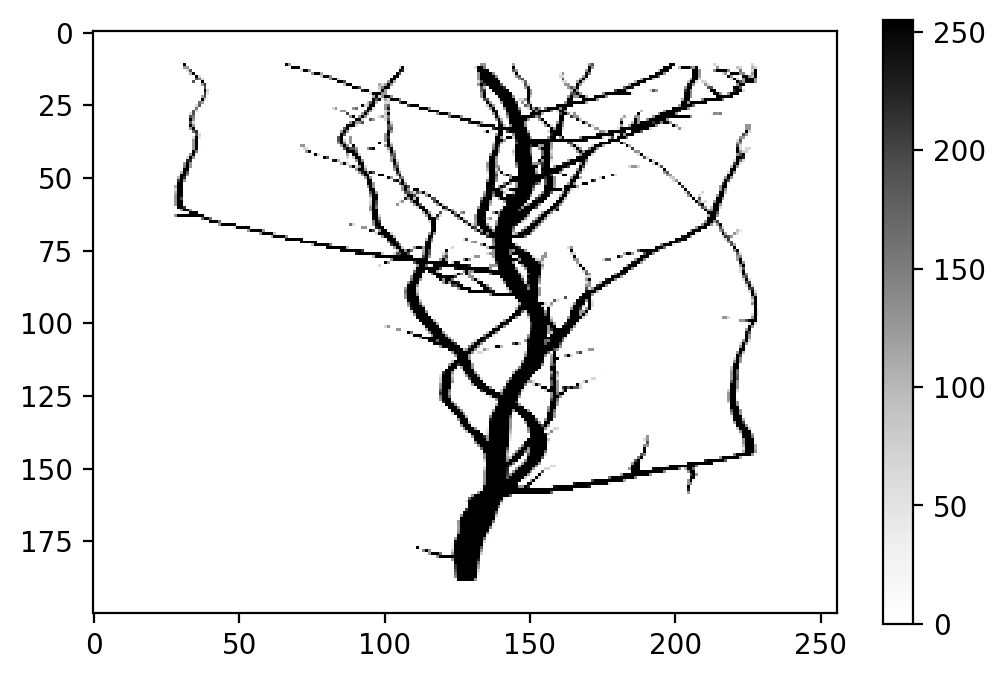

In [94]:
# plot_merged_slices(aliased, 'z', 0, 200)
# plot_merged_slices(aliased, 'x', 0, 256)
plot_merged_slices(aliased, 'y', 0, 256)

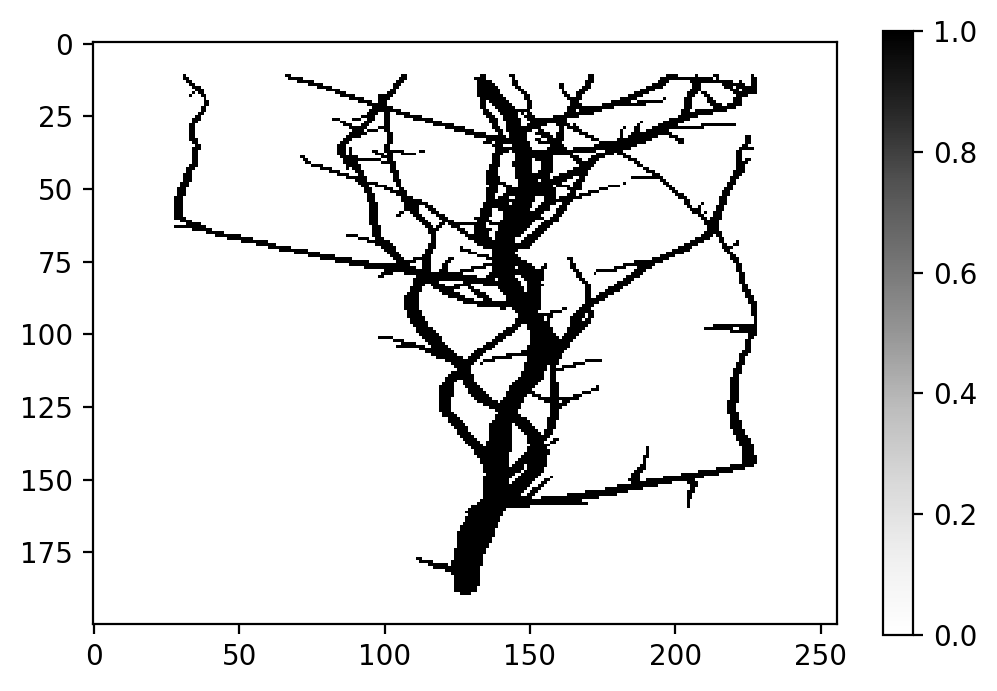

In [110]:
# antialiased[antialiased>0.3]=1
a2 = (antialiased>0.1).astype(int)
plot_merged_slices(a2, 'y', 0, 256)

In [107]:
(a2!=a1).sum()

0

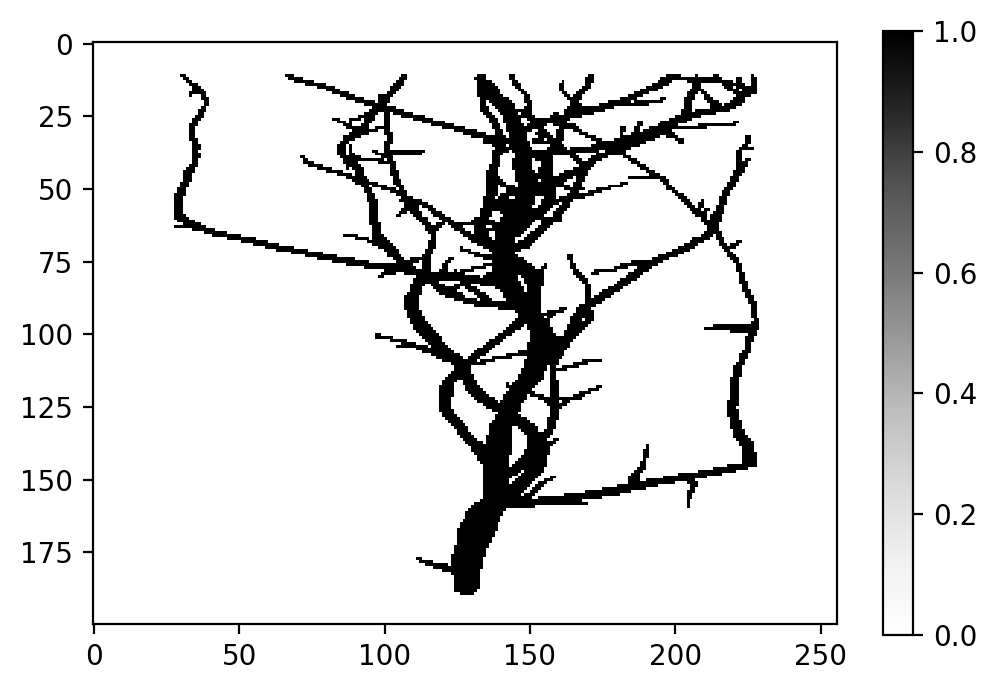

In [96]:
# plot_merged_slices(antialiased, 'z', 0, 200)
# plot_merged_slices(antialiased, 'x', 0, 256)
a1= antialiased
plot_merged_slices(a1, 'y', 0, 256)


In [75]:
# (antialiased==1).sum()/antialiased.size
a=(antialiased>0).astype(int)
# antialiased[a.astype(bool)]=0

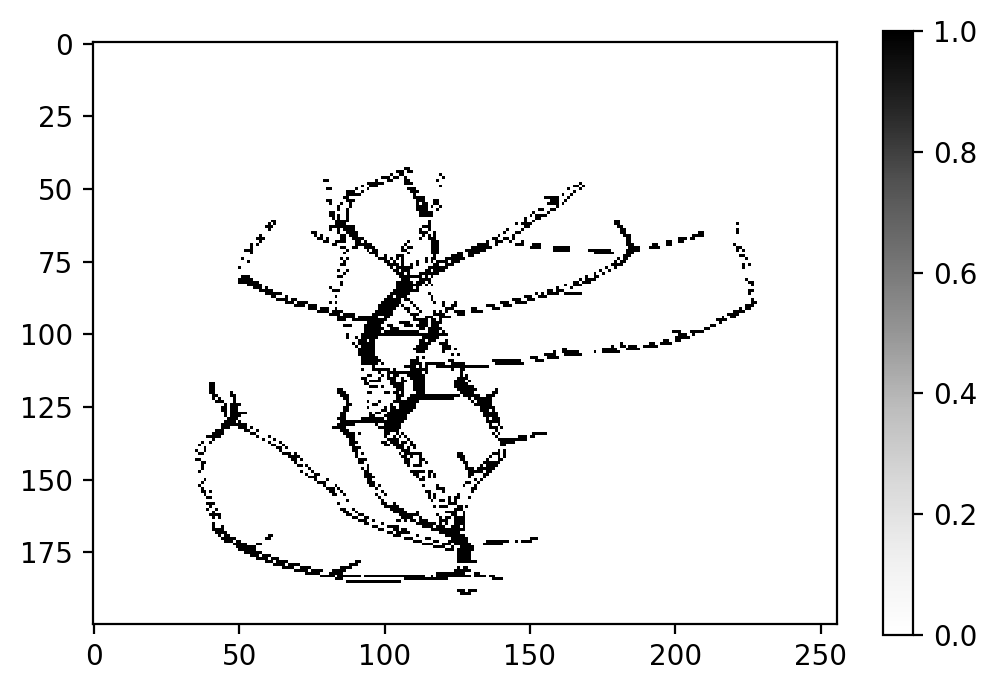

In [74]:
# plot_merged_slices(a, 'z', 0, 200)
# plot_merged_slices(a, 'x', 0, 256)
plot_merged_slices(a, 'y', 0, 256)

In [87]:
aliased[antialiased>0]=0

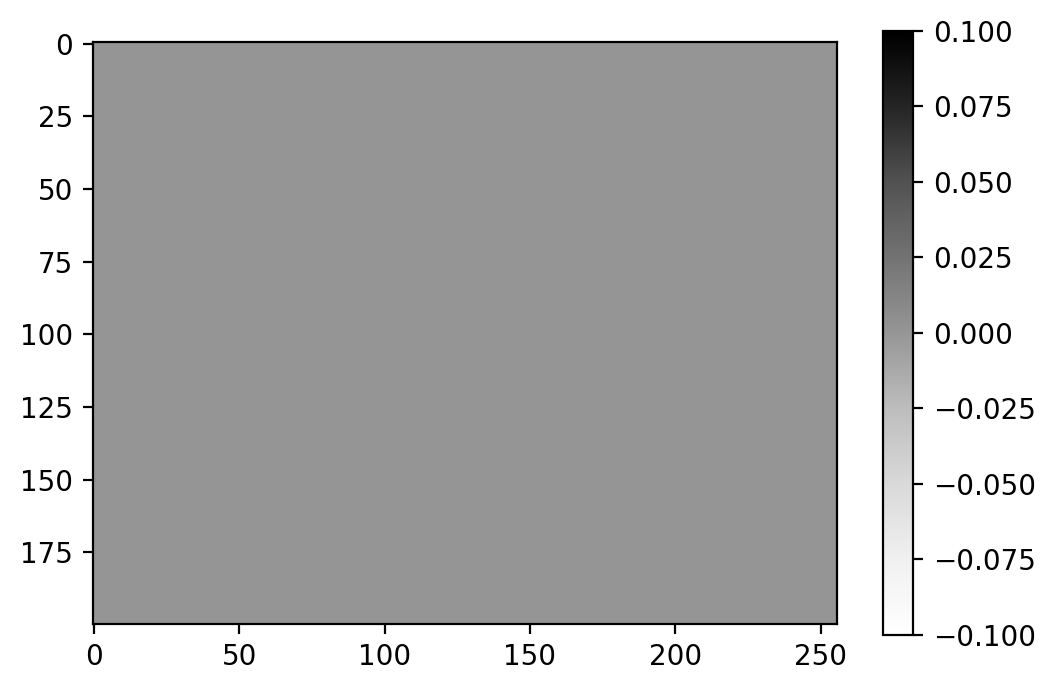

In [88]:
# plot_merged_slices(a, 'z', 0, 200)
# plot_merged_slices(a, 'x', 0, 256)
plot_merged_slices(aliased, 'y', 0, 256)

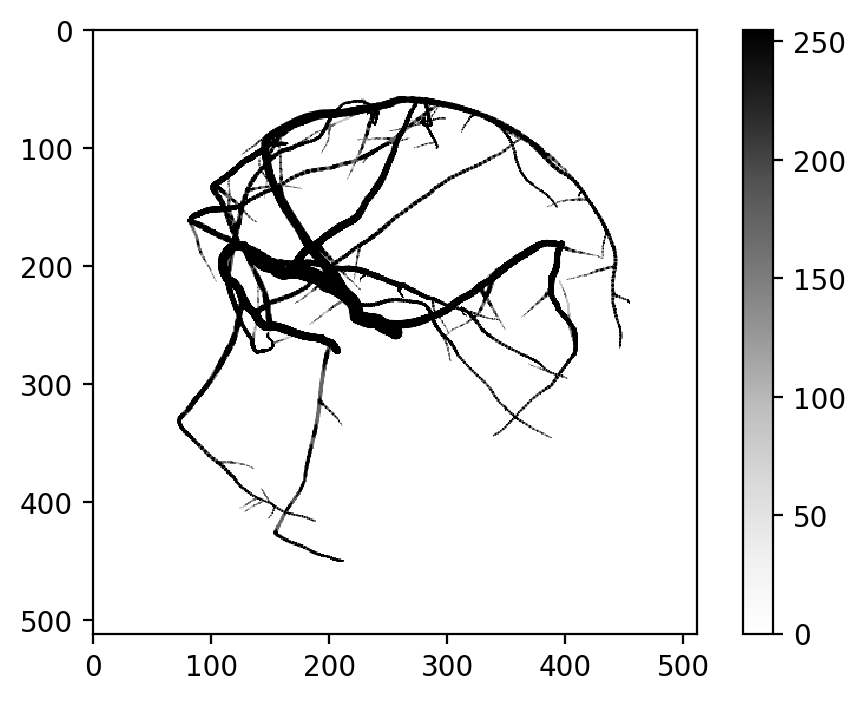

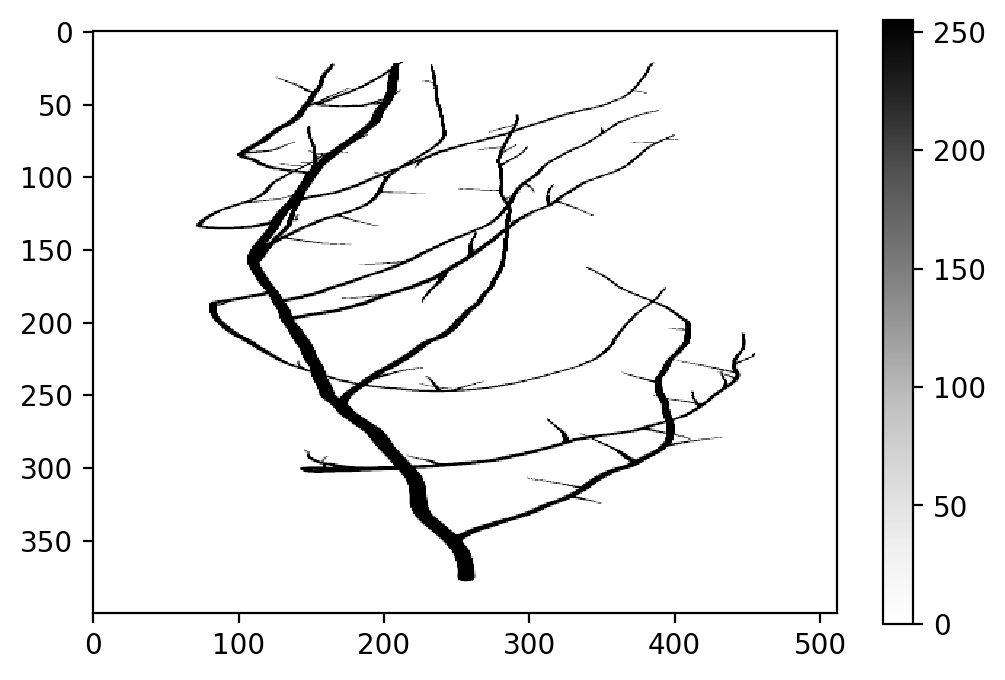

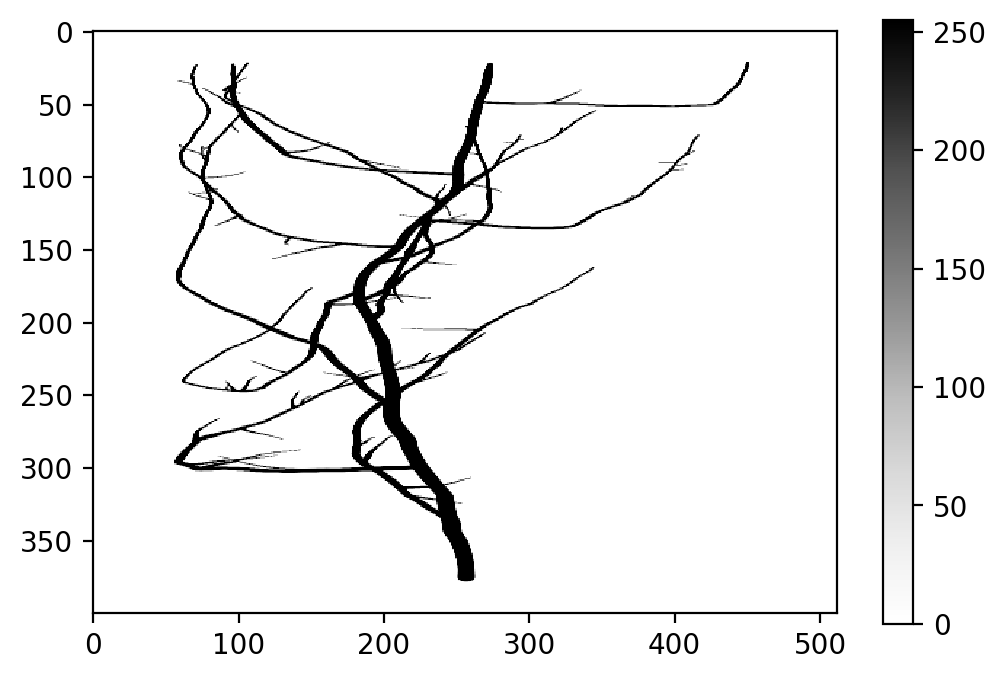

In [62]:
plot_merged_slices(gt_original, 'z', 0, 400)
plot_merged_slices(gt_original, 'x', 0, 512)
plot_merged_slices(gt_original, 'y', 0, 512)

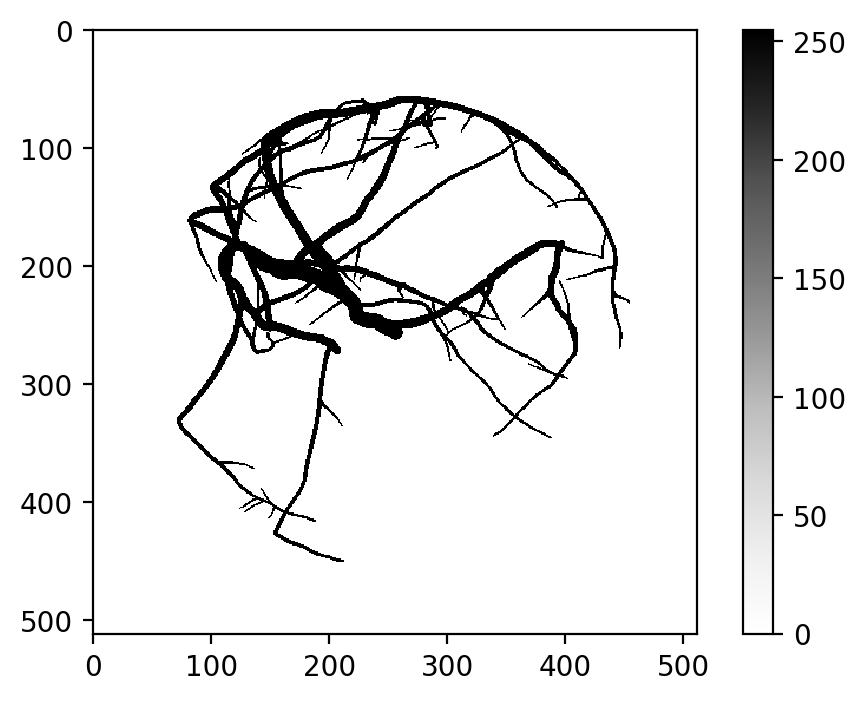

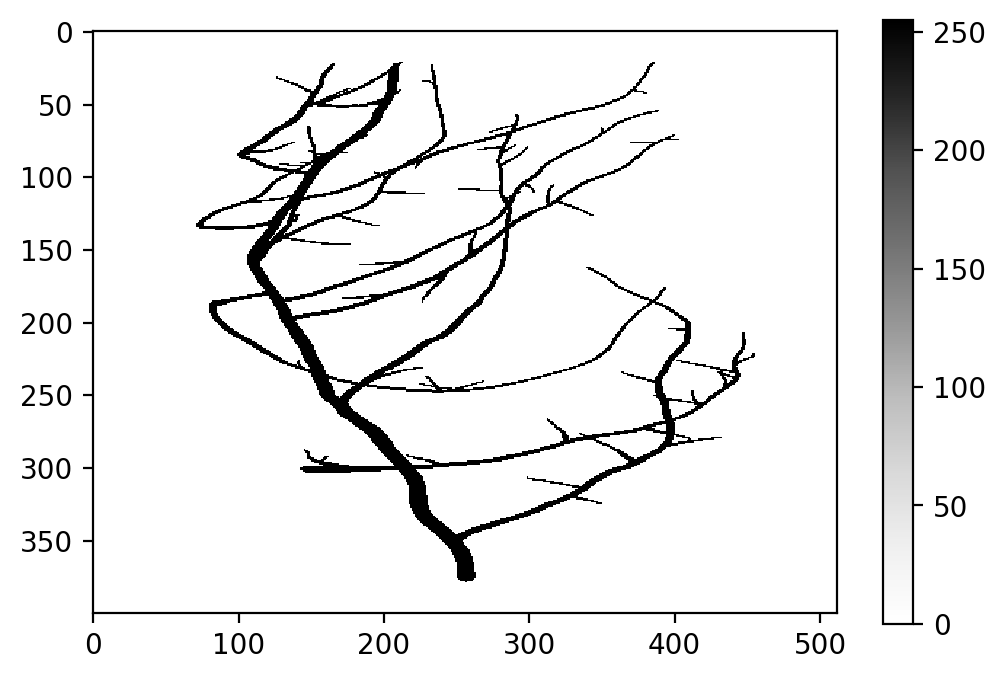

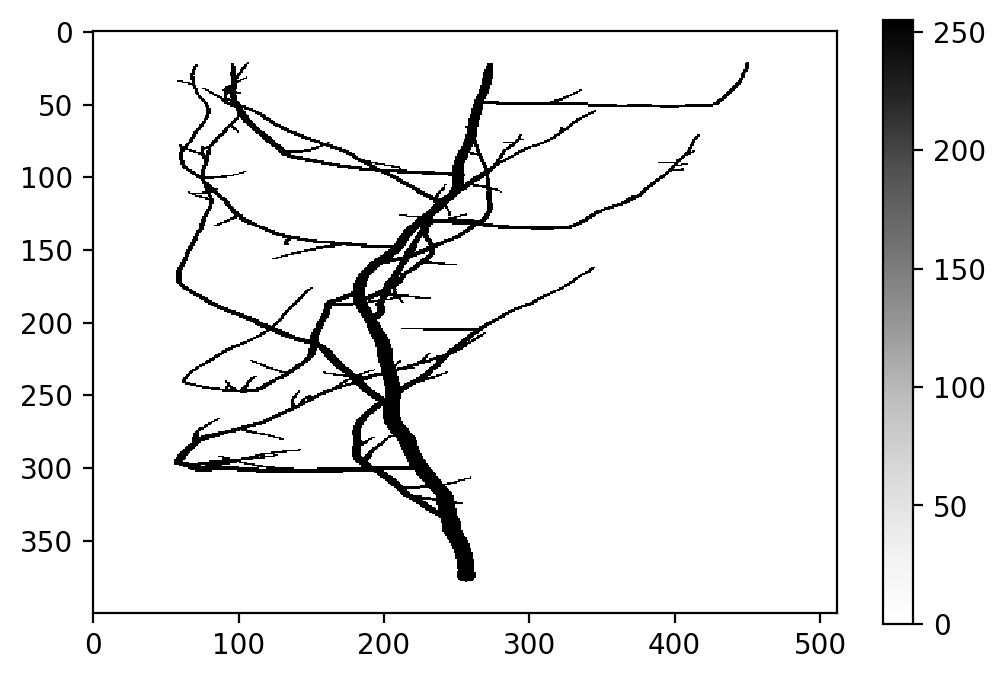

In [63]:
plot_merged_slices(gt, 'z', 0, 400)
plot_merged_slices(gt, 'x', 0, 512)
plot_merged_slices(gt, 'y', 0, 512)

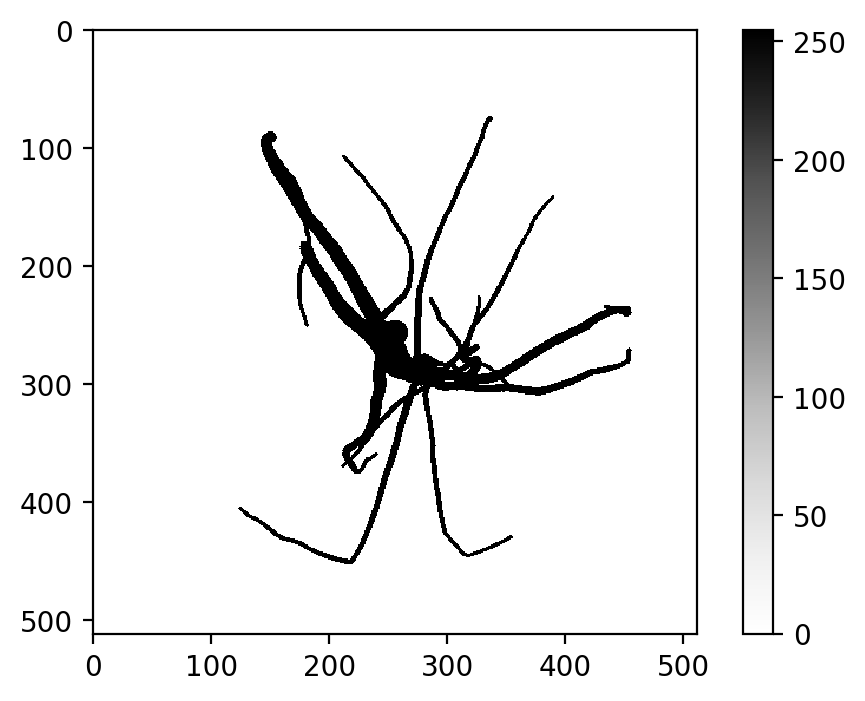

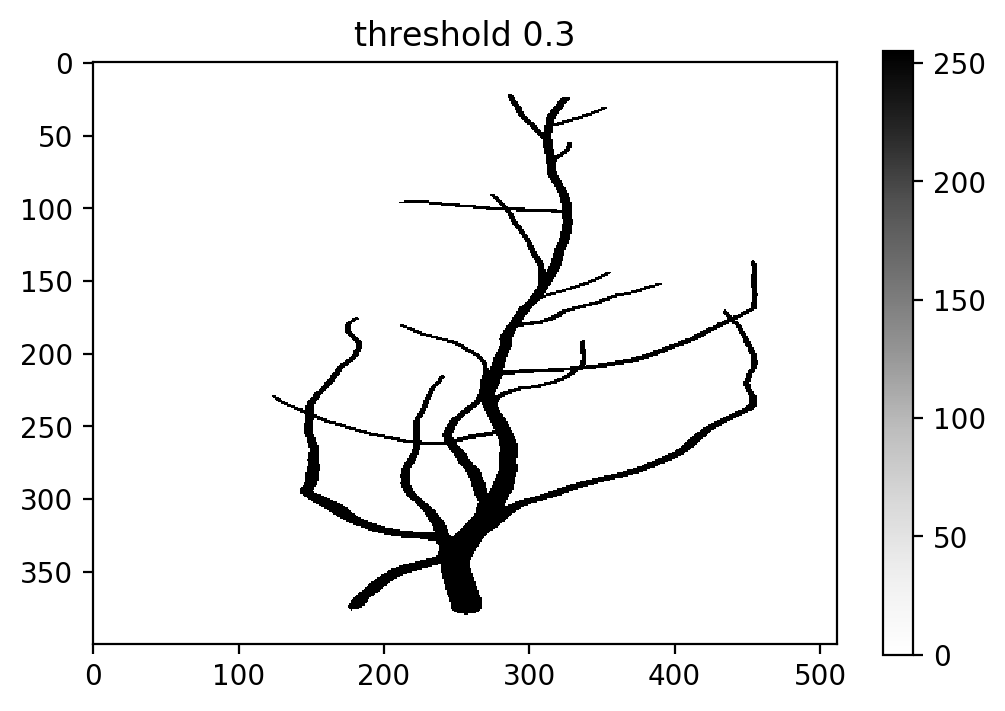

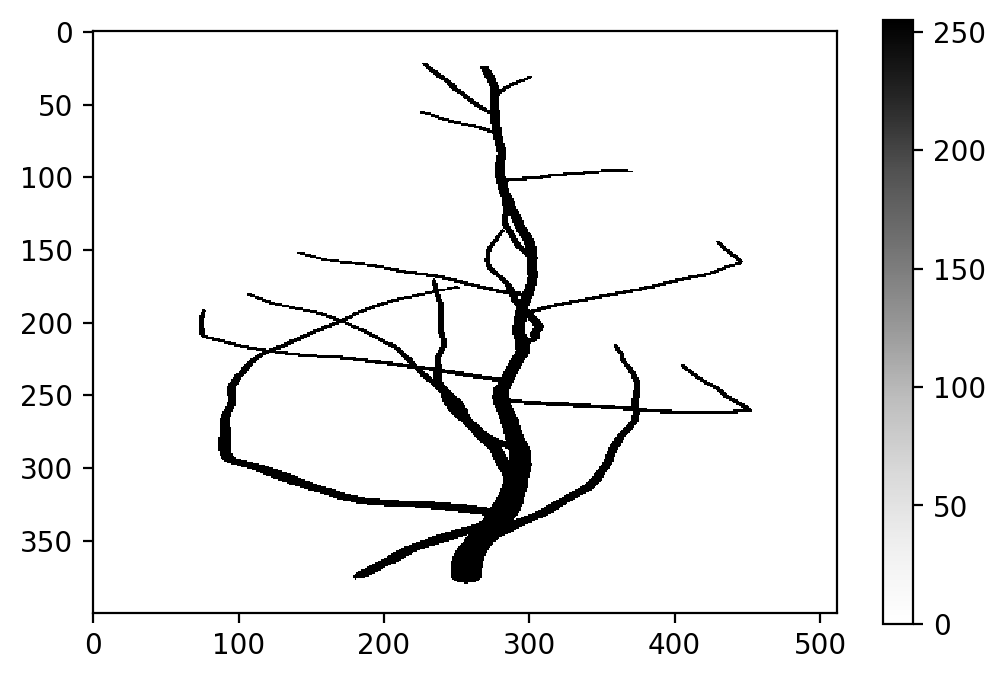

In [25]:
threshold = 0.3
gt_new = deepcopy(gt_original)
# positive_mask = (gt_new>=threshold*gt_new.max()).astype(bool)
# negative_mask = (np.ones(gt_new.shape) - positive_mask.astype(int)).astype(bool)
# gt_new[positive_mask] = gt_new.max()
# gt_new[negative_mask] = 0

gt_max_value = gt_new.max()
gt_new = (gt_new>=threshold*gt_max_value).astype(int)*gt_max_value

plot_merged_slices(gt_new, 'z', 0, 400)
plot_merged_slices(gt_new, 'x', 0, 512, title='threshold {:.1f}'.format(threshold))
plot_merged_slices(gt_new, 'y', 0, 512)

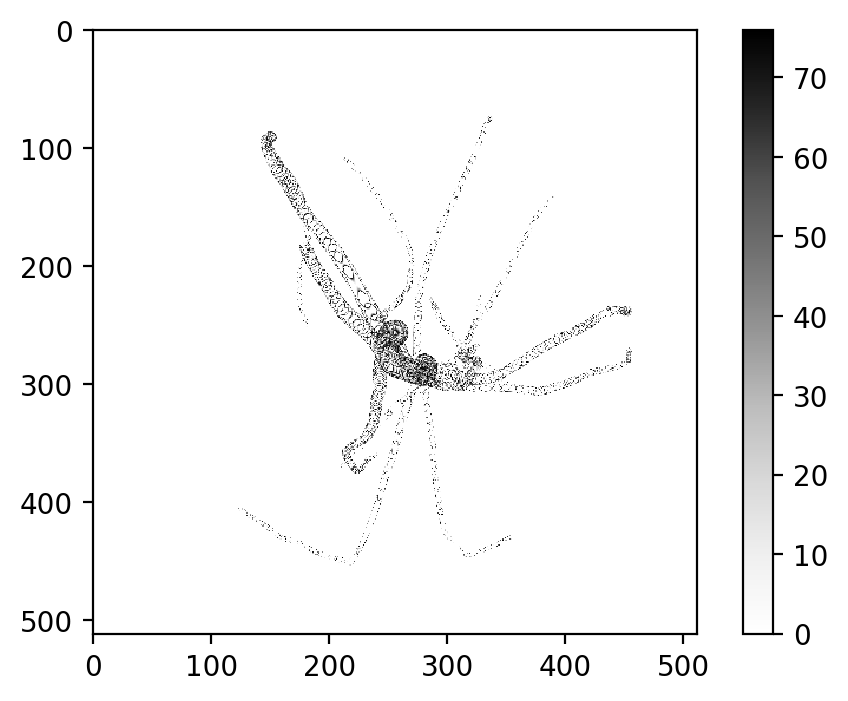

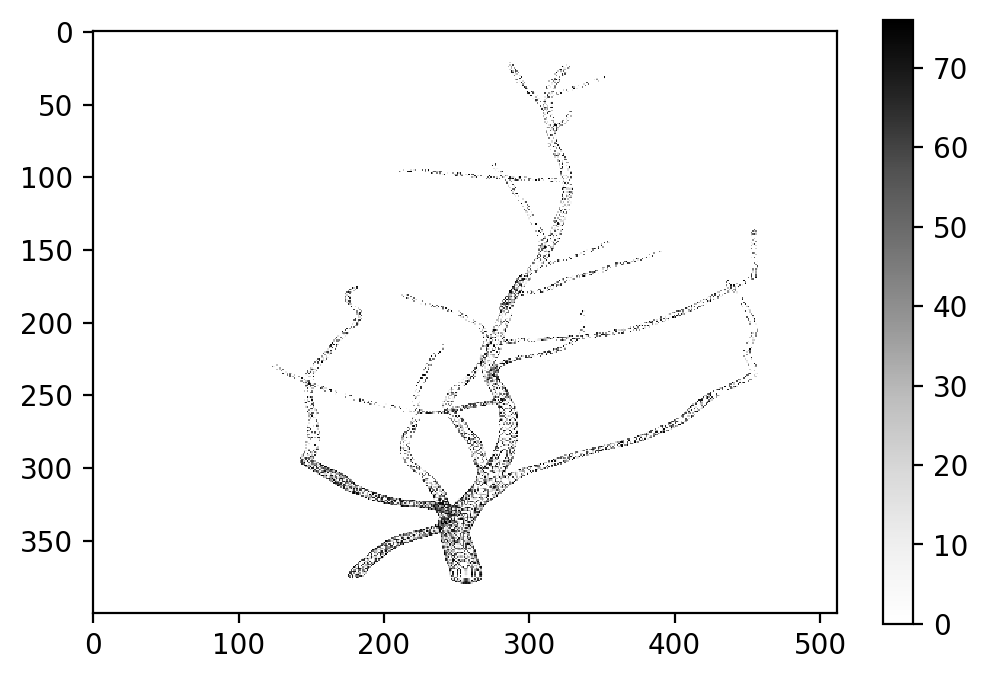

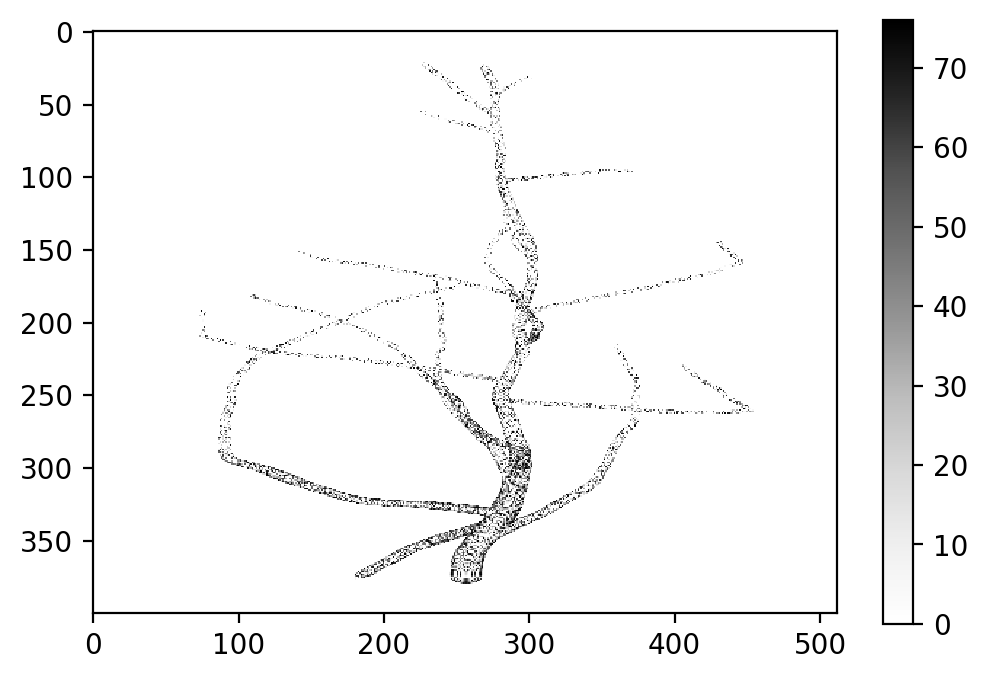

In [26]:
gt_original_copy = deepcopy(gt_original)
gt_original_copy[gt_new.astype(bool)] = 0
# the part of root that are not to be segmented as root
plot_merged_slices(gt_original_copy, 'z', 0, 400)
plot_merged_slices(gt_original_copy, 'x', 0, 512)
plot_merged_slices(gt_original_copy, 'y', 0, 512)

### Convert all the gt in the path to the thresholded version, and save

In [108]:
data_dir = '/home/user/zhaoy/local_dir/data/random_virtual_roots/temp'

def apply_threshold_to_gt(gt_original, threshold=0.3):
    gt_max_value = gt_original.max()
    return (gt_original>threshold*gt_max_value).astype(int)*gt_max_value  # >=

def search_for_gt(data_dir):
    for fn in os.listdir(data_dir):
        if isdir(join(data_dir, fn)):
            search_for_gt(join(data_dir, fn))
#         elif fn == 'ground_truth_res_2x.npy':
#         elif fn == 'occupancy_512x512x400.npy':
        elif fn == 'occupancy_small_antialias_256x256x200.npy':
            print(data_dir)
            
# #             # change data type from int64 to uint8
# #             gt = np.load(join(data_dir, fn))
# #             gt = gt.astype(np.uint8)
# #             print(gt.dtype)
# #             np.save(join(data_dir, fn), gt)

#             # rename
# #             os.rename(join(data_dir, fn), join(data_dir, 'ground_truth_res_2x_notThresholded.npy'))
#             os.rename(join(data_dir, fn), join(data_dir, 'occupancy_small_antialias_256x256x200_notThresholded.npy'))
            
#             # get thresholded gt and save as another file
#             gt_original = np.load(join(data_dir, 'occupancy_small_antialias_256x256x200_notThresholded.npy'))
#             gt_thresholded = apply_threshold_to_gt(gt_original, threshold=0)
#             print('saving the thresholded gt...')
#             np.save(join(data_dir, 'occupancy_small_antialias_256x256x200.npy'), gt_thresholded.astype(np.uint8))

search_for_gt(data_dir)  

/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/716297
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/771052
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/934775
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/580403
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/756394
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/343001
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/367146
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/610538
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/800900
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/164793
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/im

saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/650219
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/564282
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/627681
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/891005
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/654914
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/100912
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/803858
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/654589
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/356813
saving the thresholded gt...
/home/user/zhaoy/local_dir/data/random_virtual_roots/temp/422123
saving the thresholded gt...
/home/user/zhaoy/local_dir/data